In [182]:
import numpy as np
import random
import time
import math
import matplotlib.pyplot as plt

'''
capacidade_mochila = 20000 # GIGANTE
valor_items = [random.randint(10,150) for x in range(0,1000)]
pesos_items = [random.randint(1,50) for x in range(0,1000)]
num_items =len(valor_items)

temperatura = 100000
iteracoes_a = 100000
arrefecer = 0.9999

tamanho = min(10, num_items // 2)
iteracoes_t = 500
num_vizinhos = 100
'''


capacidade_mochila = 11000 # LONG RANGE
valor_items = [random.randint(10,150) for x in range(0,500)]
pesos_items = [random.randint(1,50) for x in range(0,500)]
num_items =len(valor_items)

temperatura = 10000
iteracoes_a = 8000
arrefecer = 0.999

tamanho = min(40, num_items // 2)
iteracoes_t = 200
num_vizinhos = 50


'''
capacidade_mochila = 900 # MEDIUM RANGE
valor_items = [random.randint(10,150) for x in range(0,50)]
pesos_items = [random.randint(1,50) for x in range(0,50)]
num_items = len(valor_items)

temperatura = 1000
iteracoes_a = 1000
arrefecer = 0.992

tamanho = min(10, num_items // 2)
iteracoes_t = 50
num_vizinhos = 20
'''

'''
capacidade_mochila = 50 # SHORT RANGE
valor_items = [25,35,50,15,40,45,20,30,55,10,60,15]
pesos_items = [5,8,12,3,15,18,7,9,25,2,30,6]
num_items = len(valor_items)

temperatura = 100
iteracoes_a = 100
arrefecer = 0.90

tamanho = min(10, num_items // 2)
iteracoes_t = 20
num_vizinhos = 20
'''

'''
capacidade_mochila = 500 # MELHOR CASO POSSIVEL
valor_items = [random.randint(2,7) for x in range(0,100)]
pesos_items = [random.randint(1,6) for x in range(0,100)]
num_items = len(valor_items)

temperatura = 1000
iteracoes_a = 1000
arrefecer = 0.99

tamanho = min(10, num_items // 2)
iteracoes_t = 50
num_vizinhos = 50
'''

'''
capacidade_mochila = 10 # PIOR CASO POSSIVEL
valor_items = [10,43,5,23,54,77]
pesos_items = [12,44,57,33,22,14]
num_items = len(valor_items)

temperatura = 1000
iteracoes_a = 100
arrefecer = 0.99

tamanho = min(10, num_items // 2)
iteracoes_t = 50
'''

# https://www.youtube.com/watch?v=cJ21moQpofY
# função que aplica o algoritmo a cima descrito

def mochila(n,c,vl,ps):
    m = np.zeros((n,c))

    for i in range(n):
        for k in range(c):
            if i != 0 and k != 0:
                if ps[i-1] <= k:
                  m[i][k] = max(vl[i-1] + m[i-1][k-ps[i-1]],m[i-1][k])
                else:
                  m[i][k] = m[i-1][k]
    
    return m

inicio = time.time()
m = mochila(num_items+1,capacidade_mochila+1,valor_items,pesos_items)
fim = time.time()

print("melhor beneficio possivel: "+str(np.max(m)))
# print(m) # matriz
print("tempo execucao: "+str(fim-inicio))

melhor beneficio possivel: 40294.0
tempo execucao: 10.095144987106323


capacidade_mochila: 11000
capacidade solucao: 11000
solucao: [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,

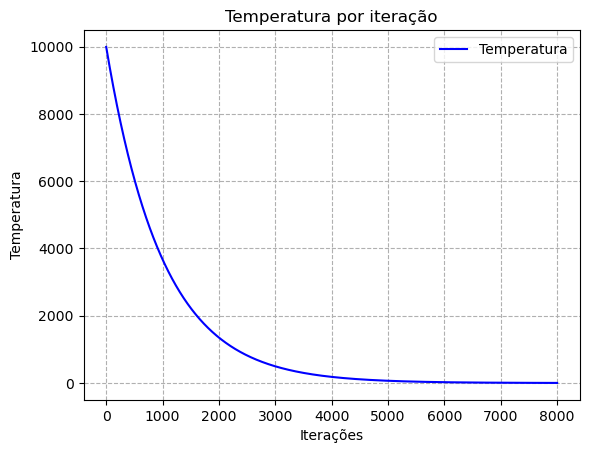

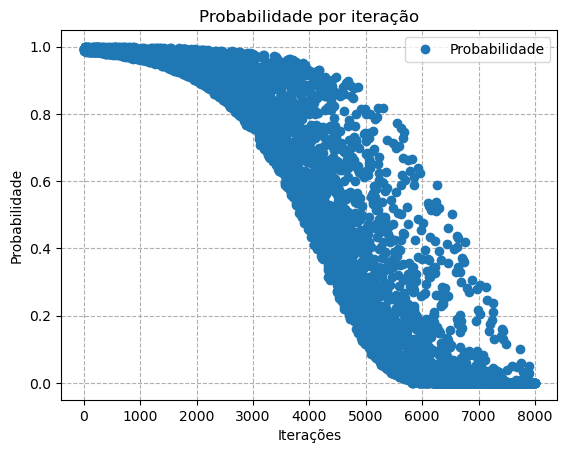

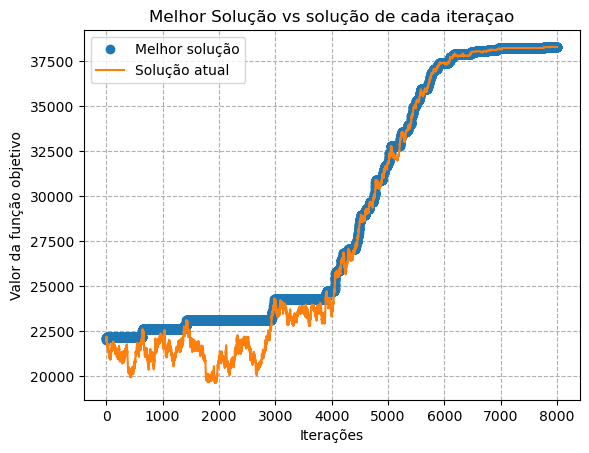

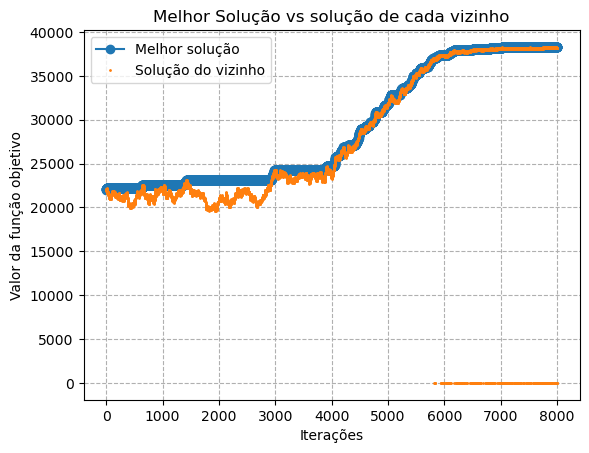

In [183]:
lista_temp = []
lista_prob = []
lista_melhor = []
lista_atual = []
lista_visinho = []

# Calcula o valor e os pesos da escolha de objetos da soluçao dada
def calc_valor(solucao):
    valor = 0
    peso = 0
    for i in range(num_items):
        valor += solucao[i] * valor_items[i]
        peso += solucao[i] * pesos_items[i]
    if peso > capacidade_mochila:
        return -1
    return valor

# implementa o simulated annealing
def sim_an(num, temp, iter,arr):
    global lista_temp, lista_atual, lista_melhor, lista_prob, lista_visinho

    # comecar com uma solucao aleatoria
    solucao_temp = [random.choice([0,1]) for nada in range(num)]
    maximo_temp = calc_valor(solucao_temp)

    maximo = maximo_temp
    solucao = solucao_temp[:]

    for zero in range(iter):
        
        # vai alterando a temperatura a cada iteracao
        temp *= arr
        lista_temp.append(temp)

        # faz o vizinho a partir da solucao atual, calcula o seu valor
        visinho = solucao_temp[:]
        i = random.randint(0,num-1)
        visinho[i] = 1 - visinho[i]
        visinho_val = calc_valor(visinho)
        
        # calcula a probabilidade
        if temp < 0.01 or (visinho_val - maximo_temp) / temp < -700:
            prob = 0
        elif (visinho_val - maximo_temp) / temp > 700:
            prob = 1
        else:
            prob = min(1,math.exp((visinho_val - maximo_temp) / temp)) # aqui é feito o minimo porque a probabilidade pode ser maior que 1

        if prob == 1:
            lista_prob.append(None)
        else:
            lista_prob.append(prob)

        # muda o valor atual dependendo ou da probabilidade ou do valor do vizinho
        # se o valor do vizinho for maior que o maior valor entra
        # ou entao se a probabilidade deixar entra, temperatura mais altas mais chance de entrar
        if visinho_val > maximo_temp or random.random() < prob:
            maximo_temp = visinho_val
            solucao_temp = visinho[:]

            if maximo_temp > maximo:
                maximo = maximo_temp
                solucao = solucao_temp[:]
        
        lista_melhor.append(maximo)
        lista_atual.append(maximo_temp)
        lista_visinho.append(visinho_val)

    return maximo, solucao

inicio = time.time()
maximo, solucao = sim_an(num_items,temperatura,iteracoes_a,arrefecer)
fim = time.time()

if maximo == -1 or maximo == 0:
    print("nao foi encontrada solução")
else:

    p = 0
    for i in range(0,num_items):
        p += solucao[i]*pesos_items[i]
    print("capacidade_mochila: " +str(capacidade_mochila))
    print("capacidade solucao: "+str(p)) 
    print("solucao: "+str(solucao))
    print("beneficio solucao: "+str(maximo))
    print("tempo execucao simulated annealing: "+str(fim-inicio))

    plt.plot(list(range(0,iteracoes_a)), lista_temp, color='blue', label='Temperatura')
    plt.title('Temperatura por iteração')
    plt.xlabel('Iterações')
    plt.ylabel('Temperatura')
    plt.grid(True, linestyle='--')
    plt.legend()

    plt.show()

    plt.plot(list(range(0,iteracoes_a)), lista_prob,'o', label='Probabilidade')
    plt.title('Probabilidade por iteração')
    plt.xlabel('Iterações')
    plt.ylabel('Probabilidade')
    plt.grid(True, linestyle='--')
    plt.legend()

    plt.show()

    plt.plot(list(range(0,iteracoes_a)), lista_melhor, 'o', label='Melhor solução')
    plt.plot(list(range(0,iteracoes_a)), lista_atual, '-', label='Solução atual')
    plt.title('Melhor Solução vs solução de cada iteraçao')
    plt.xlabel('Iterações')
    plt.ylabel('Valor da função objetivo')
    plt.grid(True, linestyle='--')
    plt.legend()

    plt.show()

    plt.plot(list(range(0,iteracoes_a)), lista_melhor, marker="o", label='Melhor solução')
    plt.plot(list(range(0,iteracoes_a)), lista_visinho, marker=".",linestyle="none", label='Solução do vizinho',markersize=2)
    plt.title('Melhor Solução vs solução de cada vizinho')
    plt.xlabel('Iterações')
    plt.ylabel('Valor da função objetivo')
    plt.grid(True, linestyle='--')
    plt.legend()

Capacidade da mochila: 11000
capacidade solucao: 10996
tempo de execuçao: 1.3652946949005127
Melhor soluçao:  [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1

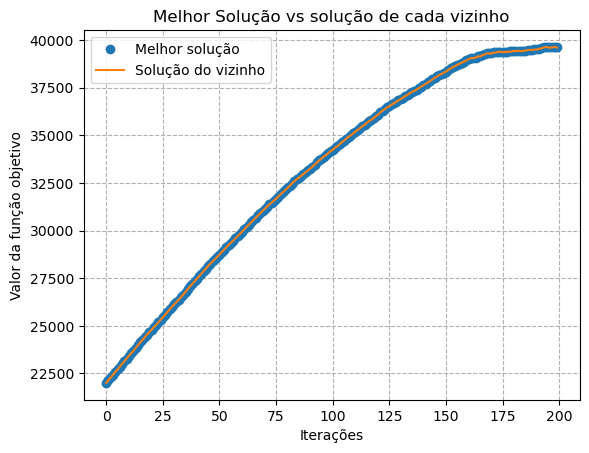

In [184]:
lista_atual = []
lista_melhor = []

random.seed(2)

# calcular o valor da solucao
def calc_valor(solucao):
    valor = 0
    peso = 0
    for i in range(num_items):
        valor += solucao[i] * valor_items[i]
        peso += solucao[i] * pesos_items[i]
    
    avaliacao = valor * (1 - max(0, peso-capacidade_mochila)) # funcao a maximizar
    return avaliacao

# fazer vizinhos
def vizinhos(solucao, num_vizinhos):
    vizinho_lista = []
    # faz n vizinhos diferentes para uma posição aleatoria da soluçao
    for nadinha in range(num_vizinhos):
        i = random.randint(0, num_items - 1)
        vizinho = solucao[:]
        vizinho[i] = 1 - vizinho[i] # troca o valor de apenas 1 elemento do vizinho
        vizinho_lista.append(vizinho)
    return vizinho_lista


def tabu(num_items,iteracoes, tabu_tam,num_vizinhos):
    
    # comeca com uma solucao random
    solucao_atual = [random.choice([0, 1]) for _ in range(num_items)]
    valor_atual = calc_valor(solucao_atual)

    solucao_melhor = solucao_atual[:]
    valor_melhor = valor_atual

    tabu_set = set()
    tabu_lista = []

    for _ in range(iteracoes):

        # fazer os vizinhos e ver os que nao estao na lista do tabu
        vizinhos_todos = vizinhos(solucao_atual,num_vizinhos)
        
        candidate_solutions = [
            [vizinho, calc_valor(vizinho)]
            for vizinho in vizinhos_todos if tuple(vizinho) not in tabu_set
        ]
        
        # ver o melhor vizinho de todos eles
        melhor_candidato = max(candidate_solutions, key=lambda x: x[1])

        # dar update dependendo do melhor vizinho
        solucao_atual = melhor_candidato[0]
        valor_atual = melhor_candidato[1]

        lista_atual.append(valor_atual)

        # update ao melhor de todos
        if valor_atual > valor_melhor:
            solucao_melhor = solucao_atual[:]
            valor_melhor = valor_atual

        # update a lista tabu
        tabu_lista.append(solucao_atual)
        if len(tabu_lista) > tabu_tam:
            tabu_lista.pop(0)
        lista_melhor.append(valor_melhor)

    return solucao_melhor, valor_melhor

inicio = time.time()
solucao, valor = tabu(num_items,iteracoes_t,tamanho,num_vizinhos)
fim = time.time()

if valor == 0:
    print("nao foi encontrada solução")
else:
    p = 0
    for i in range(0,num_items):
        p += solucao[i]*pesos_items[i]

    print("Capacidade da mochila: "+str(capacidade_mochila))
    print("capacidade solucao: "+str(p))
    print("tempo de execuçao: "+str(fim - inicio))
    print("Melhor soluçao: ", solucao)
    print("Melhor valor: ", valor)

    plt.plot(list(range(0,iteracoes_t)), lista_melhor, 'o', label='Melhor solução')
    plt.plot(list(range(0,iteracoes_t)), lista_atual, '-', label='Solução do vizinho')
    plt.title('Melhor Solução vs solução de cada vizinho')
    plt.xlabel('Iterações')
    plt.ylabel('Valor da função objetivo')
    plt.grid(True, linestyle='--')
    plt.legend()

In [185]:
#comparaçao dos dados
'''
lista_tempo_m = []
lista_tempo_a = []
lista_tempo_t = []

lista_resultado_m = []
lista_resultado_a = []
lista_resultado_t = []


for i in range(0,50):
    print(i)
    inicio = time.time()
    solucao_t, valor = tabu(num_items,iteracoes_t,tamanho,num_vizinhos)
    fim = time.time()
    tempo_t = fim - inicio

    inicio = time.time()
    maximo, solucao_a = sim_an(num_items,temperatura,iteracoes_a,arrefecer)
    fim = time.time()
    tempo_a = fim - inicio

    inicio = time.time()
    m = mochila(num_items+1,capacidade_mochila+1,valor_items,pesos_items)
    fim = time.time()
    tempo_m = fim - inicio

    lista_tempo_m.append(tempo_m)
    lista_tempo_a.append(tempo_a)
    lista_tempo_t.append(tempo_t)

    lista_resultado_m.append(np.max(m))
    lista_resultado_a.append(maximo-np.max(m))
    lista_resultado_t.append(valor-np.max(m))


print("tempo de exercuçao bottom-up: "+str(np.mean(np.array(lista_tempo_m))))
print("tempo de exercuçao annealing: "+str(np.mean(np.array(lista_tempo_a))))
print("tempo de exercuçao tabu: "+str(np.mean(np.array(lista_tempo_t))))

print("\nderivação ao resultado bottom-up: "+str(lista_resultado_m[0]))
print("derivação ao annealing: "+str(np.mean(np.array(lista_resultado_a))))
print("derivação ao tabu: "+str(np.mean(np.array(lista_resultado_t))))

'''

'\nlista_tempo_m = []\nlista_tempo_a = []\nlista_tempo_t = []\n\nlista_resultado_m = []\nlista_resultado_a = []\nlista_resultado_t = []\n\n\nfor i in range(0,50):\n    print(i)\n    inicio = time.time()\n    solucao_t, valor = tabu(num_items,iteracoes_t,tamanho,num_vizinhos)\n    fim = time.time()\n    tempo_t = fim - inicio\n\n    inicio = time.time()\n    maximo, solucao_a = sim_an(num_items,temperatura,iteracoes_a,arrefecer)\n    fim = time.time()\n    tempo_a = fim - inicio\n\n    inicio = time.time()\n    m = mochila(num_items+1,capacidade_mochila+1,valor_items,pesos_items)\n    fim = time.time()\n    tempo_m = fim - inicio\n\n    lista_tempo_m.append(tempo_m)\n    lista_tempo_a.append(tempo_a)\n    lista_tempo_t.append(tempo_t)\n\n    lista_resultado_m.append(np.max(m))\n    lista_resultado_a.append(maximo-np.max(m))\n    lista_resultado_t.append(valor-np.max(m))\n\n\nprint("tempo de exercuçao bottom-up: "+str(np.mean(np.array(lista_tempo_m))))\nprint("tempo de exercuçao annealin

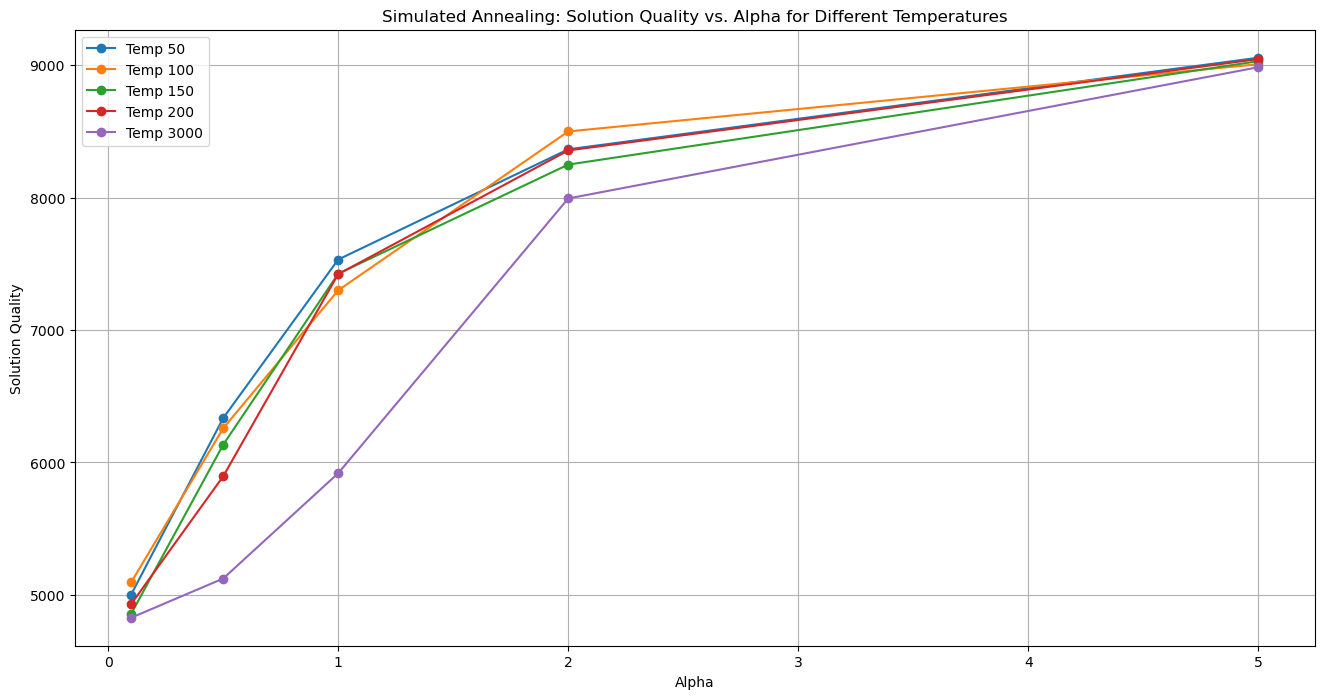

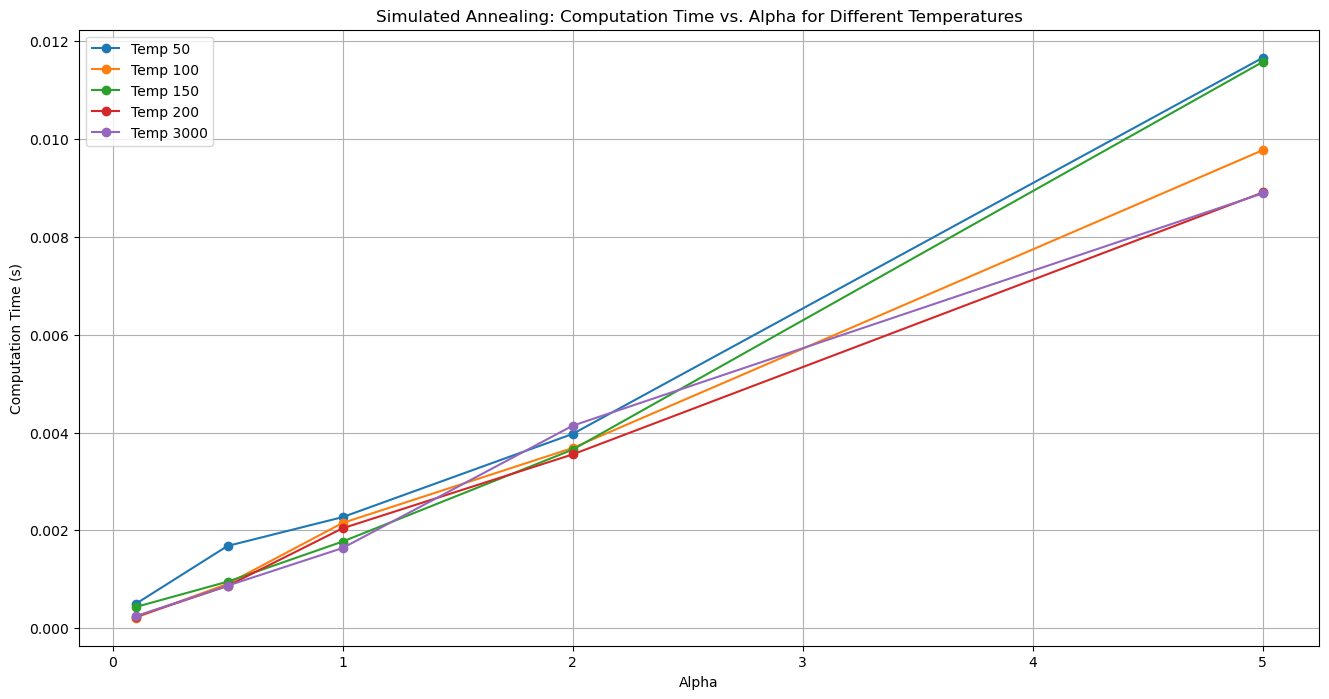

{'temperatura': 100,
 'alpha': 0.1,
 'iteracoes': 10,
 'tempo': 0.00021207332611083984,
 'solucao': 5094.0}

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Experiment settings
num_items = 100
arrefecer = 0.95  # Cooling rate for Simulated Annealing
temperaturas = [50, 100, 150, 200, 3000]  # Temperatures to test
alphas = [0.1, 0.5, 1, 2, 5]  # Alpha values to test
results_sim_an = []  # To store results for simulated annealing

# Simulated Annealing Experiment (10 tests per point)
for temperatura in temperaturas:
    for alpha in alphas:
        iteracoes = int(alpha * num_items)  # I = alpha * n
        tempos = []  # To store computation times for the 10 tests
        solucoes = []  # To store solutions for the 10 tests
        
        # Perform 10 tests and compute averages for both time and solution quality
        for _ in range(10):
            inicio = time.time()
            maximo, solucao = sim_an(num_items, temperatura, iteracoes, arrefecer)
            fim = time.time()
            tempo_a = fim - inicio
            tempos.append(tempo_a)
            solucoes.append(maximo)
        
        # Store the averages of the times and solutions
        results_sim_an.append({
            "temperatura": temperatura,
            "alpha": alpha,
            "iteracoes": iteracoes,
            "tempo": np.mean(tempos),
            "solucao": np.mean(solucoes)
        })

# Extract data for plotting
temperatures = sorted(set(r["temperatura"] for r in results_sim_an))
alphas = sorted(set(r["alpha"] for r in results_sim_an))

# Plot Solution Quality vs. Alpha for Different Temperatures
plt.figure(figsize=(16, 8))
for temperatura in temperatures:
    subset = [r for r in results_sim_an if r["temperatura"] == temperatura]
    alphas_plot = [r["alpha"] for r in subset]
    solutions = [r["solucao"] for r in subset]
    plt.plot(alphas_plot, solutions, marker="o", label=f"Temp {temperatura}")

plt.title("Simulated Annealing: Solution Quality vs. Alpha for Different Temperatures")
plt.xlabel("Alpha")
plt.ylabel("Solution Quality")
plt.legend()
plt.grid(True)
plt.show()

# Plot Computation Time vs. Alpha for Different Temperatures
plt.figure(figsize=(16, 8))
for temperatura in temperatures:
    subset = [r for r in results_sim_an if r["temperatura"] == temperatura]
    alphas_plot = [r["alpha"] for r in subset]
    times = [r["tempo"] for r in subset]
    plt.plot(alphas_plot, times, marker="o", label=f"Temp {temperatura}")

plt.title("Simulated Annealing: Computation Time vs. Alpha for Different Temperatures")
plt.xlabel("Alpha")
plt.ylabel("Computation Time (s)")
plt.legend()
plt.grid(True)
plt.show()

# Best configuration based on solution/compute time ratio
best_config_sa = max(results_sim_an, key=lambda r: r["solucao"] / r["tempo"])
best_config_sa


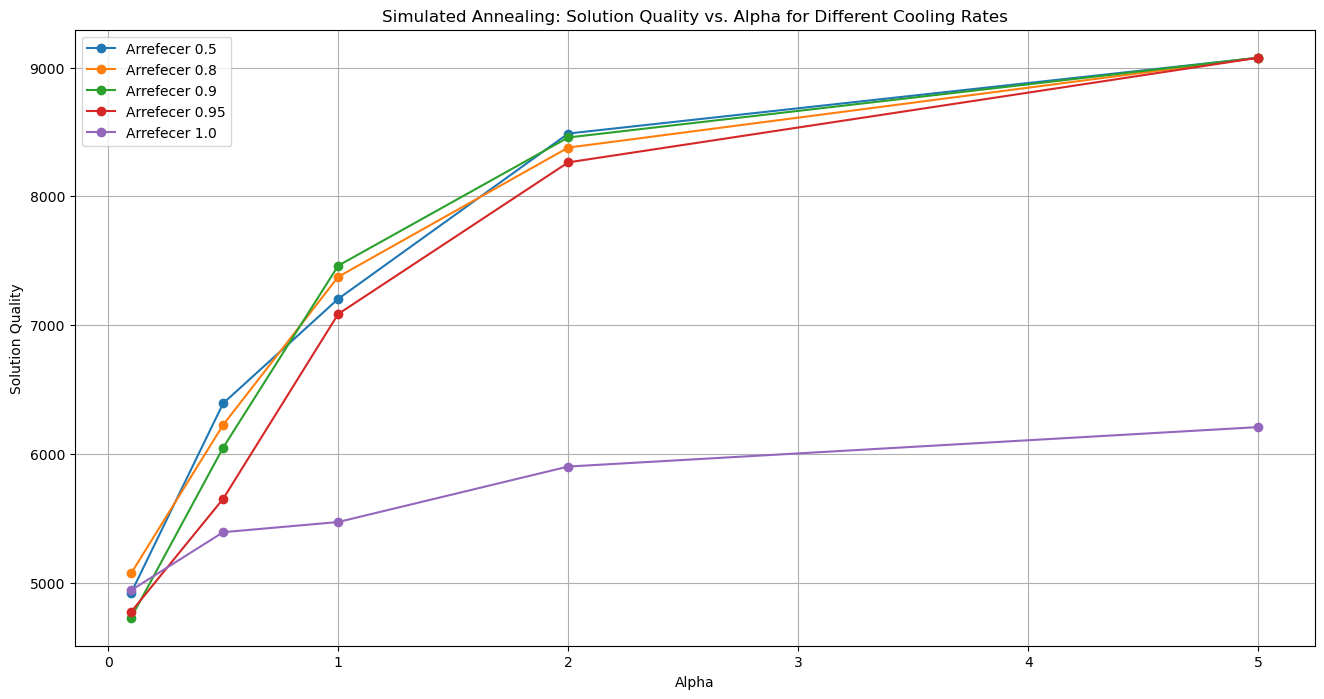

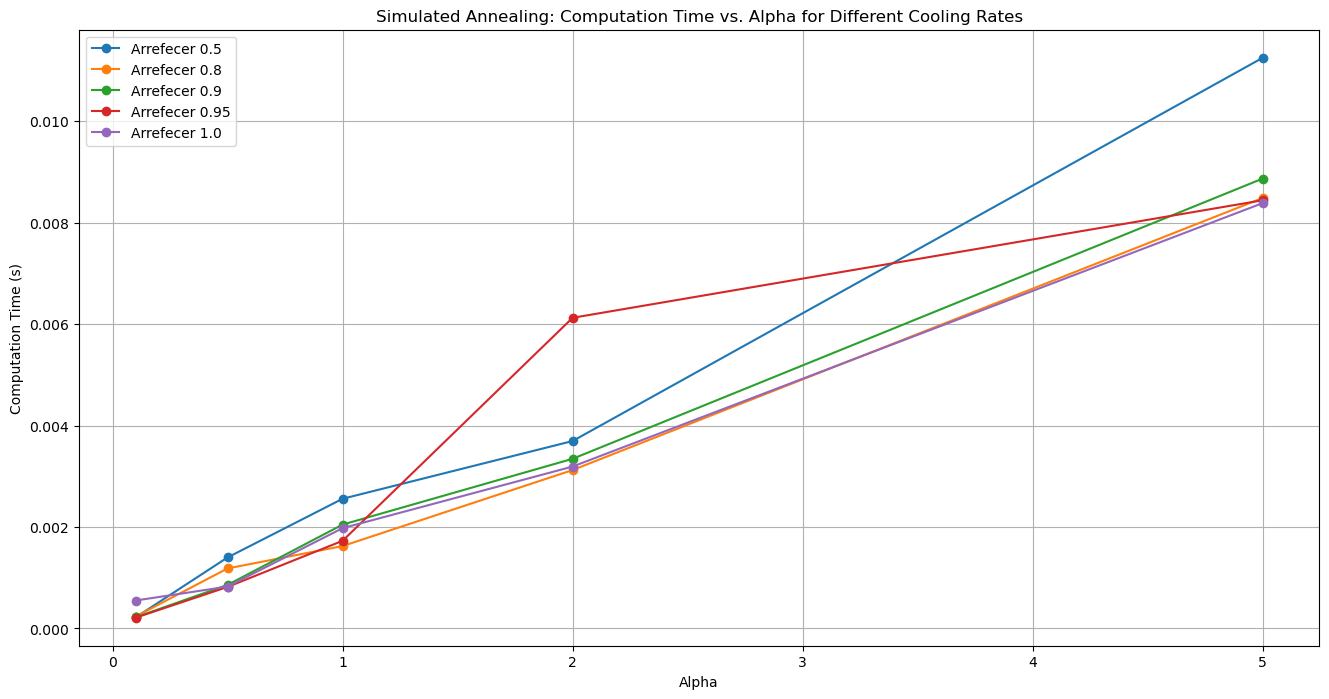

{'arrefecer': 0.5,
 'alpha': 0.1,
 'iteracoes': 10,
 'tempo': 0.00021755695343017578,
 'solucao': 4920.0}

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Experiment settings
num_items = 100
temperature = 300  # Fixed temperature
arrefecers = [0.50, 0.80, 0.90, 0.95, 1.0]  # Different cooling rates to test
alphas = [0.1, 0.5, 1, 2, 5]  # Alpha values to test
results_sim_an = []  # To store results for simulated annealing

# Simulated Annealing Experiment (10 tests per point)
for arrefecer in arrefecers:
    for alpha in alphas:
        iteracoes = int(alpha * num_items)  # I = alpha * n
        tempos = []  # To store computation times for the 10 tests
        solucoes = []  # To store solutions for the 10 tests
        
        # Perform 10 tests and compute median for both time and solution quality
        for _ in range(10):
            inicio = time.time()
            maximo, solucao = sim_an(num_items, temperature, iteracoes, arrefecer)
            fim = time.time()
            tempo_a = fim - inicio
            tempos.append(tempo_a)
            solucoes.append(maximo)
        
        # Store the median of the times and solutions
        results_sim_an.append({
            "arrefecer": arrefecer,
            "alpha": alpha,
            "iteracoes": iteracoes,
            "tempo": np.median(tempos),
            "solucao": np.median(solucoes)
        })

# Extract data for plotting
arrefecers_sorted = sorted(set(r["arrefecer"] for r in results_sim_an))
alphas_sorted = sorted(set(r["alpha"] for r in results_sim_an))

# Preparing plots for Solution Quality vs. Alpha for Different Cooling Rates (arrefecer)
plt.figure(figsize=(16, 8))
for arrefecer in arrefecers_sorted:
    subset = [r for r in results_sim_an if r["arrefecer"] == arrefecer]
    alphas_plot = [r["alpha"] for r in subset]
    solutions = [r["solucao"] for r in subset]
    plt.plot(alphas_plot, solutions, marker="o", label=f"Arrefecer {arrefecer}")

plt.title("Simulated Annealing: Solution Quality vs. Alpha for Different Cooling Rates")
plt.xlabel("Alpha")
plt.ylabel("Solution Quality")
plt.legend()
plt.grid(True)
plt.show()

# Preparing plots for Computation Time vs. Alpha for Different Cooling Rates (arrefecer)
plt.figure(figsize=(16, 8))
for arrefecer in arrefecers_sorted:
    subset = [r for r in results_sim_an if r["arrefecer"] == arrefecer]
    alphas_plot = [r["alpha"] for r in subset]
    times = [r["tempo"] for r in subset]
    plt.plot(alphas_plot, times, marker="o", label=f"Arrefecer {arrefecer}")

plt.title("Simulated Annealing: Computation Time vs. Alpha for Different Cooling Rates")
plt.xlabel("Alpha")
plt.ylabel("Computation Time (s)")
plt.legend()
plt.grid(True)
plt.show()

# Best configuration based on solution/compute time ratio
best_config_sa = max(results_sim_an, key=lambda r: r["solucao"] / r["tempo"])
best_config_sa


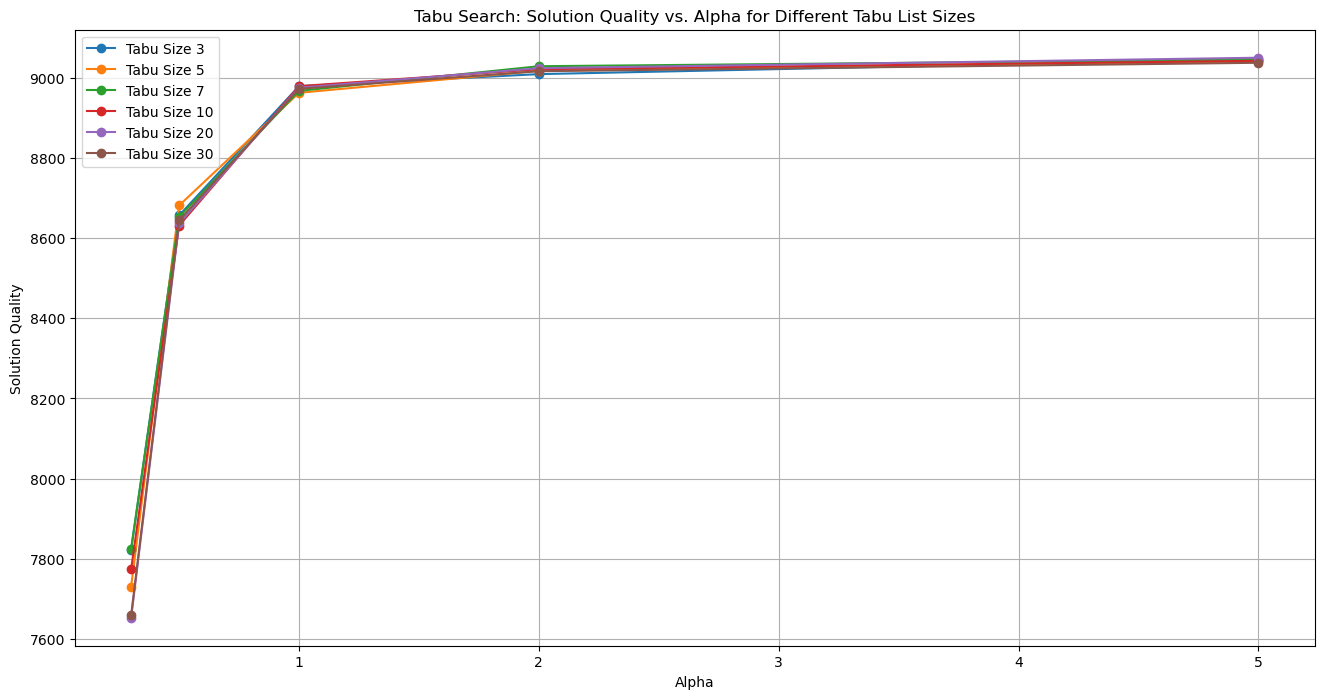

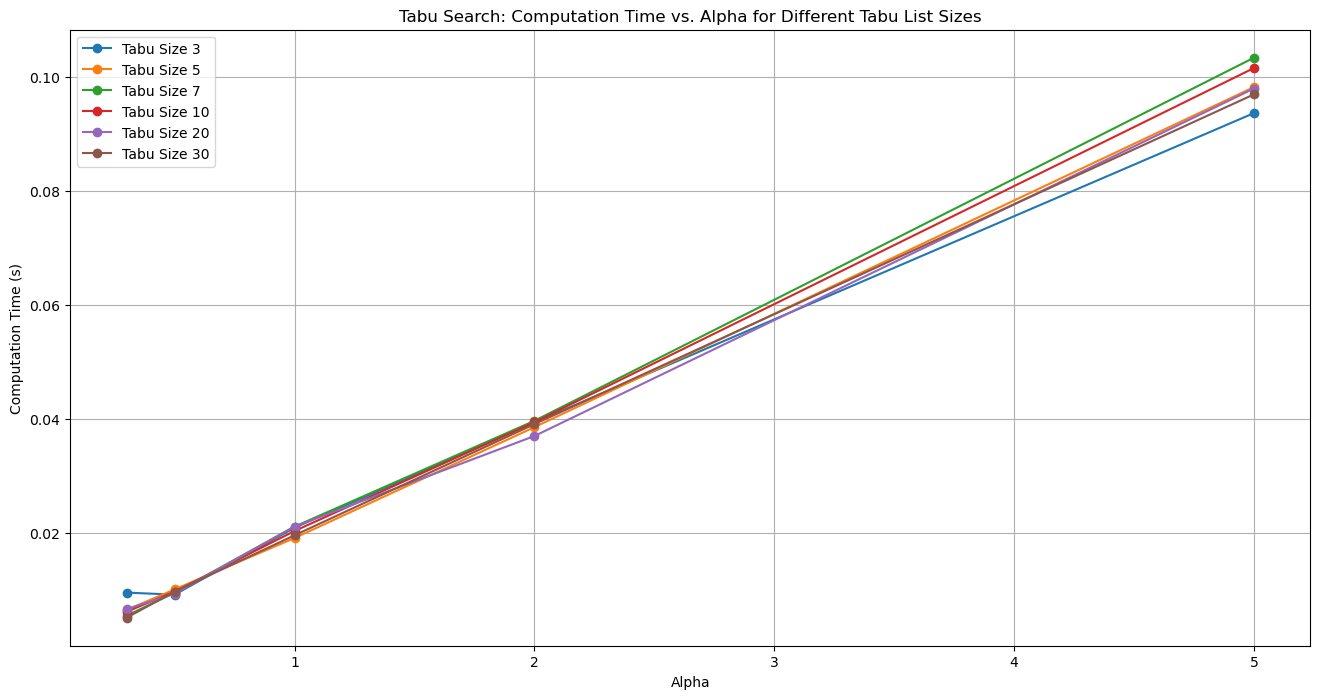

{'alpha': 0.3,
 'tamanho': 30,
 'iteracoes_t': 30,
 'tempo': 0.005224466323852539,
 'solucao': 7659.4}

In [190]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Tabu Search Experiment
num_items = 100
alphas = [0.3, 0.5, 1, 2, 5]  # Alpha values to test
tamanhos_tabu = [3, 5, 7, 10, 20, 30]  # Different tabu list sizes to test
results_tabu = []  # To store results for tabu search

# Tabu Search Experiment (10 tests per point)
for alpha in alphas:
    iteracoes_t = int(alpha * num_items)  # Number of iterations depends on alpha
    for tamanho in tamanhos_tabu:
        tempos = []  # To store computation times for the 10 tests
        solucoes = []  # To store solutions for the 10 tests
        
        # Perform 10 tests and compute averages for both time and solution quality
        for _ in range(10):
            inicio = time.time()
            solucao_t, valor = tabu(num_items, iteracoes_t, tamanho, num_vizinhos=10)
            fim = time.time()
            tempo_t = fim - inicio
            tempos.append(tempo_t)
            solucoes.append(valor)
        
        # Store the averages of the times and solutions
        results_tabu.append({
            "alpha": alpha,
            "tamanho": tamanho,
            "iteracoes_t": iteracoes_t,
            "tempo": np.mean(tempos),
            "solucao": np.mean(solucoes)
        })

# Extract data for plotting
alphas_sorted = sorted(set(r["alpha"] for r in results_tabu))
tabu_sizes = sorted(set(r["tamanho"] for r in results_tabu))

# Plot Solution Quality vs. Alpha for Different Tabu List Sizes
plt.figure(figsize=(16, 8))
for tamanho in tabu_sizes:
    subset = [r for r in results_tabu if r["tamanho"] == tamanho]
    alphas_plot = [r["alpha"] for r in subset]
    solutions = [r["solucao"] for r in subset]
    plt.plot(alphas_plot, solutions, marker="o", label=f"Tabu Size {tamanho}")

plt.title("Tabu Search: Solution Quality vs. Alpha for Different Tabu List Sizes")
plt.xlabel("Alpha")
plt.ylabel("Solution Quality")
plt.legend()
plt.grid(True)
plt.show()

# Plot Computation Time vs. Alpha for Different Tabu List Sizes
plt.figure(figsize=(16, 8))
for tamanho in tabu_sizes:
    subset = [r for r in results_tabu if r["tamanho"] == tamanho]
    alphas_plot = [r["alpha"] for r in subset]
    times = [r["tempo"] for r in subset]
    plt.plot(alphas_plot, times, marker="o", label=f"Tabu Size {tamanho}")

plt.title("Tabu Search: Computation Time vs. Alpha for Different Tabu List Sizes")
plt.xlabel("Alpha")
plt.ylabel("Computation Time (s)")
plt.legend()
plt.grid(True)
plt.show()

# Best configuration based on solution/compute time ratio
best_config_tabu = max(results_tabu, key=lambda r: r["solucao"] / r["tempo"])
best_config_tabu
